In [1]:
from remotesensing.image import Loader

import matplotlib.pyplot as plt

## Loading

In [2]:
image = Loader().load('test.tif')

## Metadata
Images contain basic metadata regarding their shape and geospatial properties

In [3]:
print(image.width, image.height, image.band_count)

250 250 3


In [4]:
print(image.epsg, image.geotransform)

32640 (ulx, uly): (626685.0, 2492115.0) | xdist: 30.0


## Displaying
The image ndarray can be accessed simply by calling `pixels`

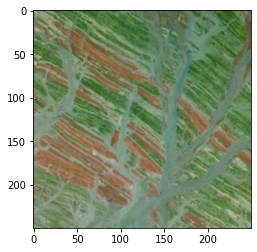

In [5]:
plt.imshow(image.pixels)

## Slicing
Slicing the image will automatically update its Geotransform allowing us to save the image without having to worry about updating the coordinate information

In [6]:
subset = image[150:250, 150:250, 0]
print(subset.geotransform)

(ulx, uly): (631185.0, 2487615.0) | xdist: 30.0


## Saving

Images can be saved easily to a filepath

In [7]:
subset.save('subset.tif', data_type='uint8')

## Clipping

Images are clipped using `GeoPolygon` objects which are essentially just a Shapely Polygon with an EPSG. 

Every Image has a `footprint` property which is a `GeoPolygon` describing the image extent.

Before using the boundary to clip the image, it must be transformed to pixel coordinates using `to_pixel`.

The image Geotransform will be automatically updated after the image is clipped.

In [8]:
from remotesensing.geometry import GeoPolygon


clip_extent = GeoPolygon(image.footprint.polygon.buffer(-900).buffer(800), epsg=image.epsg)
pixel_polygon = clip_extent.to_pixel(image.geotransform)
clipped = image.clip_with(pixel_polygon, mask_value=0)

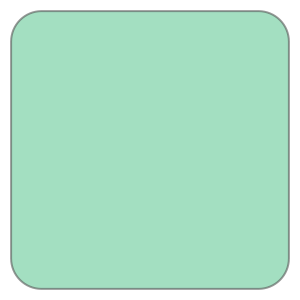

In [9]:
clip_extent.polygon

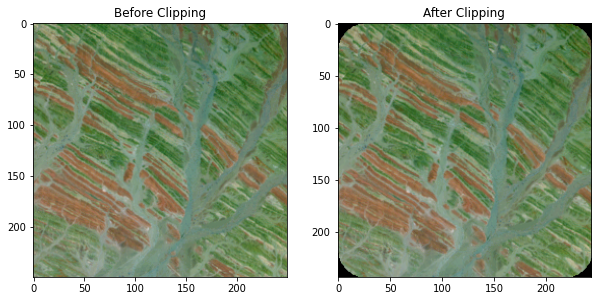

In [10]:
f, axes = plt.subplots(1, 2, figsize=(10, 10))

for im, ax, title in zip([image, clipped], axes, ['Before Clipping', 'After Clipping']):
    
    ax.set_title(title)
    ax.imshow(im.pixels)

### Modifying pixel values
To avoid needing to construct `Image` objects from scratch whenever you need create a derived product 
or having to modify the `pixels` property directly, the `apply` method is useful to ensure that the 
pixels of the old image are maintained.

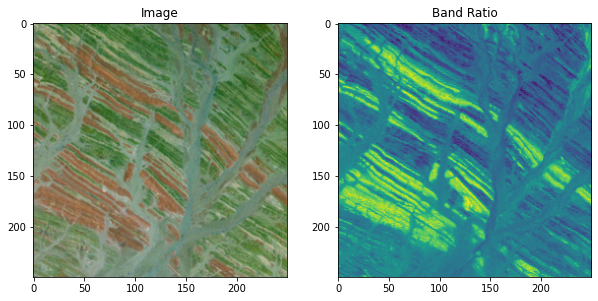

In [11]:
band_ratio = image.apply(lambda x: x[:, :, 0] / x[:, :, 1])

f, axes = plt.subplots(1, 2, figsize=(10, 10))

for im, ax, title in zip([image, band_ratio], axes, ['Image', 'Band Ratio']):
    
    ax.set_title(title)
    ax.imshow(im.pixels)